# **🚢⚓ Titanic Python Developer Technical Test 🚢⚓**


**Candidate: Oscar Duvan Rodriguez Rodriguez**

**Import the necessary libraries**

In [ ]:
import pandas as pd
import logging
import matplotlib.pyplot as plt

**Log configuration**

In [ ]:
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

**1. Load the CSV file into a DataFrame**


In [ ]:
def load_data(url: str) -> pd.DataFrame:

    try:
        df = pd.read_csv(url)
        logging.info("Data loaded correctly.")
        return df
    except Exception as e:
        logging.error(f"Error loading data: {e}")
        raise


**2. Shows basic information of the DataFrame.**

In [ ]:
def display_basic_info(df: pd.DataFrame, data_number: str):

    try:
        logging.info(f"DataFrame Dimensions: {df.shape}")
        logging.info(f"Data number: {df.size}")
        logging.info(f"Column names: {df.columns.tolist()}")
        logging.info(f"Column data types: {df.dtypes}")


        # For log visualization issues in Google Colab premium, prints were implemented

        print(f"DataFrame Dimensions: {df.shape}")
        print(f"Data number: {df.size}")
        print(f"Column names: {df.columns.tolist()}")
        print(f"Column data types: \n{df.dtypes}")

        if data_number == "init":
          display(df.head(10))
        if data_number == "end":
          display(df.tail(10))

    except Exception as e:
        logging.error(f"Error displaying DataFrame information: {e}")
        raise



**3. Passenger data with a specific identifier.**

In [ ]:
def display_passenger_info(df: pd.DataFrame, passenger_id: int):

    try:
        passenger = df[df['PassengerId'] == passenger_id]
        display(passenger)

    except Exception as e:
        logging.error(f"Error when displaying passenger data with identifier {passenger_id}: {e}")
        raise


**4. The even rows of the DataFrame.**

In [ ]:
def display_even_rows(df: pd.DataFrame):

    try:
        even_rows = df.iloc[::2]
        display(even_rows)

    except Exception as e:
        logging.error(f"Error displaying even rows: {e}")
        raise


**5. The names of people in first class arranged alphabetically.**

In [ ]:
def display_first_class_names(df: pd.DataFrame):

    try:
        first_class_names = df[df['Pclass'] == 1]['Name'].sort_values().reset_index(drop=True)
        display(first_class_names)

    except Exception as e:
        logging.error(f"Error displaying names of people in first class: {e}")
        raise


**6. Percentage of people who survived and died.**

In [ ]:
def display_survival_rate(df: pd.DataFrame):

    try:
        survival_rate = df['Survived'].value_counts(normalize=True) * 100
        survival_rate_df = pd.DataFrame({'Percentage': survival_rate})
        display(survival_rate_df)

        # Generate pie chart

        labels = ['Did not Survive', 'Survived']
        sizes = survival_rate
        colors = ['#ff9999','#66b3ff']
        explode = (0.1, 0)

        plt.figure(figsize=(4, 4))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                shadow=True, startangle=140)

        plt.title('Survival Rate on the Titanic')
        plt.axis('equal')
        plt.show()

    except Exception as e:
        logging.error(f"Error displaying survival percentage: {e}")
        raise


**7. Percentage of people who survived in each class.**

In [ ]:
def display_survival_rate_by_class(df: pd.DataFrame):

    try:
        survival_rate_by_class = df.groupby('Pclass')['Survived'].mean() * 100
        survival_rate_by_class_df = pd.DataFrame({'Survival Rate (%)': survival_rate_by_class})
        display(survival_rate_by_class_df)

        # Generate pie chart

        labels = survival_rate_by_class_df.index
        sizes = survival_rate_by_class_df['Survival Rate (%)']
        colors = ['#ff9999','#66b3ff','#99ff99']
        explode = (0.1, 0, 0)

        plt.figure(figsize=(4, 4))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
                shadow=True, startangle=140)
        plt.title('Survival Percentage by Class')
        plt.axis('equal')
        plt.show()

    except Exception as e:
        logging.error(f"Error when showing survival percentage by class: {e}")
        raise


**8. Removes passengers with unknown age from the DataFrame.**

In [ ]:
def remove_unknown_ages(df: pd.DataFrame) -> pd.DataFrame:

    try:
        df_clean = df.dropna(subset=['Age'])
        logging.info(f"Passengers with known age: {len(df_clean)}")
        return df_clean

    except Exception as e:
        logging.error(f"Error when deleting passengers with unknown age: {e}")
        raise


**9. The average age of the women traveling in each class.**

In [ ]:
def display_avg_age_women_by_class(df: pd.DataFrame):

    try:

        df_clean = remove_unknown_ages(df)

        avg_age_women_by_class = df_clean[df_clean['Sex'] == 'female'].groupby('Pclass')['Age'].mean()
        avg_age_women_by_class_df = pd.DataFrame({'Average Age': avg_age_women_by_class})
        display(avg_age_women_by_class_df)

    except Exception as e:
        logging.error(f"Error when showing average age of women by class: {e}")
        raise


**10. Add a new boolean column to see if the passenger was a minor or not.**

In [ ]:
def add_minor_column(df: pd.DataFrame):

    try:
        df_clean = remove_unknown_ages(df).copy()

        df_clean['Minor'] = df_clean['Age'] < 18
        logging.info("'Minor' column added successfully.")
        display(df_clean)
        return df_clean

    except Exception as e:
        logging.error(f"Error adding column 'Minor': {e}")
        raise


**11. Shows the percentage of minors and adults who survived in each class.**

In [ ]:
def display_survival_rate_by_age_class(df: pd.DataFrame)-> pd.DataFrame:

    try:
        df_with_minor = add_minor_column(df)

        survival_rate_by_age_class = df_with_minor.groupby(['Pclass', 'Minor'])['Survived'].mean() * 100

        survival_rate_by_age_class_df = survival_rate_by_age_class.unstack()
        display(survival_rate_by_age_class_df)

    except Exception as e:
        logging.error(f"Error when showing survival percentage by class and age: {e}")
        raise



# **Results**

**CSV file download URL**

In [ ]:
url = 'https://aprendeconalf.es/docencia/python/ejercicios/soluciones/pandas/titanic.csv'

In [ ]:
df = load_data(url)

## **Basic information**

**Initial basic information of the dataset**

In [ ]:
data_number = "init"
display_basic_info(df, data_number)

DataFrame Dimensions: (891, 12)
Data number: 10692
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Column data types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Final basic information of the dataset**

In [ ]:
data_number = "end"
display_basic_info(df, data_number)

DataFrame Dimensions: (891, 12)
Data number: 10692
Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Column data types: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


## **Passenger information 147**

In [ ]:
display_passenger_info(df, 148)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S


## **Even row information**

In [ ]:
display_even_rows(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## **Name information in first class**

In [ ]:
display_first_class_names(df)

0                        Allen, Miss. Elisabeth Walton
1                       Allison, Master. Hudson Trevor
2                         Allison, Miss. Helen Loraine
3      Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
4                                  Anderson, Mr. Harry
                            ...                       
211                        Williams, Mr. Charles Duane
212             Williams-Lambert, Mr. Fletcher Fellows
213                                  Woolner, Mr. Hugh
214                                 Wright, Mr. George
215                           Young, Miss. Marie Grice
Name: Name, Length: 216, dtype: object

## **Information on the survival rate of the Titanic**

,Percentage
Survived,
0,61.616162
1,38.383838


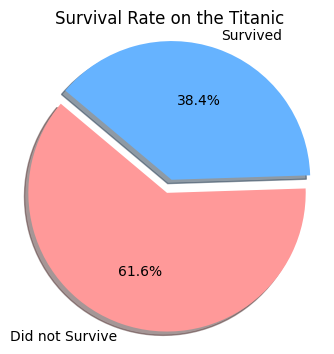

In [ ]:
display_survival_rate(df)

## **Information on survival percentage by class**

,Survival Rate (%)
Pclass,
1,62.962963
2,47.282609
3,24.236253


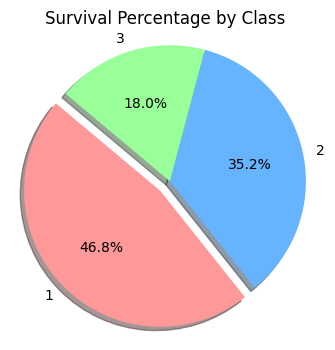

In [ ]:
display_survival_rate_by_class(df)

## **Elimination of passengers with unknown age**

In [ ]:
df_clean = remove_unknown_ages(df)

## **Information on the average age of women by class**

In [ ]:
display_avg_age_women_by_class(df)

,Average Age
Pclass,
1,34.611765
2,28.722973
3,21.750000


## **Add the "Minor" column for people of legal age (Minor=False, Major; Minor=True, Minor)**

In [ ]:
df_clean = add_minor_column(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


## **Survival percentage information by class and age**

In [ ]:
display_survival_rate_by_age_class(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Minor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,False
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,False


Minor,False,True
Pclass,,
1,63.793103,91.666667
2,41.333333,91.304348
3,20.216606,37.179487
